# Premier modèle iA

Régression linéaire simple :

L’un des modèles les plus simples d’apprentissage automatique est la régression linéaire. Lorsqu’il existe une relation linéaire entre les entités et la variable cible, il suffit de trouver l’équation de la droite dans l’espace multidimensionnel.

Utilisez les bibliothèques de Python pour récupérer le contenu du jeu de données.
  Programmez les étapes du processus de machine learning en utilisant comme algorithme de machine learning la régression simple sur le jeu données nommé **reg_simple.csv **(Pour ce brief vous allez coder l’algorithme de régression simple sans utiliser la bibliothèque Scikit-learn)

Étapes à suivre :

* Récupération des données
* Visualisation des données
* Création du modèle (model(X,theta) )
* Fonction du coût (fonction_cout(X,y,theta))
* Gradient (gradient(X,y,theta))
* Descente du gradient (descente_gradient(X,y,theta,alpha,n_iterations))
* Evaluer votre modèle en utilisant le coefficient de détermination
* Tracer la courbe de la fonction du coût selon les itérations


### Import des librairies

In [1]:
#-------- Librairies --------#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats

### Chargement et visualisation des données

In [2]:
path='./Data_reg/reg_simple.csv'
df_reg_simple = pd.read_csv(path)
df_reg_simple.head()

,heure_rev,note
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21


In [65]:
print(df_reg_simple.dtypes)

heure_rev    int64
note         int64
dtype: object


### Affichage simple pour visiualisation rapide

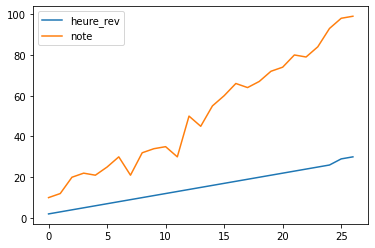

In [3]:
df_reg_simple.plot()

### Formatage du dataset et séparation target/features

shape de x:  (27, 1)
shape de y:  (27, 1)


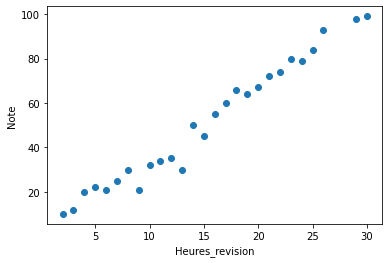

In [26]:
#Dataframe Pandas
dataframe= pd.DataFrame(df_reg_simple)

# feature x
x = np.array(dataframe['heure_rev']) 
x = x.reshape((len(x),1))

# target y
y = np.array(dataframe['note'])
y = y.reshape((len(y),1))


#vérification
print("shape de x: ", x.shape)
print("shape de y: ", y.shape)


#affichage
plt.scatter(x,y)
plt.xlabel('Heures_revision')
plt.ylabel('Note')

plt.show() 

## Concaténation et Création du modèle (model(X,theta) )
### f(x) = X.theta

In [28]:
x = np.array(df_reg_simple["heure_rev"])
x = x.reshape(len(X),1)
#affichage
x.shape

(27, 1)

In [33]:
#Colonne de 1 pour les 'b' de la fonction 'y = ax + b'
o = np.ones(x.shape)
#affichage
o.shape

(27, 1)

### Matrice de X

In [38]:
#Concaténation des Matrices 
X = np.hstack((x, o))
X.shape

(27, 2)

In [39]:
X

array([[ 2.,  1.],
       [ 3.,  1.],
       [ 4.,  1.],
       [ 5.,  1.],
       [ 6.,  1.],
       [ 7.,  1.],
       [ 8.,  1.],
       [ 9.,  1.],
       [10.,  1.],
       [11.,  1.],
       [12.,  1.],
       [13.,  1.],
       [14.,  1.],
       [15.,  1.],
       [16.,  1.],
       [17.,  1.],
       [18.,  1.],
       [19.,  1.],
       [20.,  1.],
       [21.,  1.],
       [22.,  1.],
       [23.,  1.],
       [24.,  1.],
       [25.,  1.],
       [26.,  1.],
       [29.,  1.],
       [30.,  1.]])

### Matrice de Theta

In [56]:
#juste pour initialiser Theta (d'autres methodes permettent de générer des initials plus proches du but)
theta = np.random.randn(2, 1)
theta

array([[1.76791543],
       [0.32238187]])

In [57]:
# a et b 
print('a =',theta[0], 'b =', theta[1])

a = [1.76791543] b = [0.32238187]


### Modèle (model(X,theta)
f(x) = X.theta

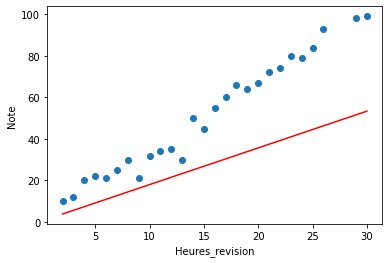

In [63]:
def modele(X, theta):
    return X.dot(theta)

#modele(X, theta)

#notes
plt.scatter(x[:,0],y)
plt.plot(x[:,0],modele(X,theta), c='r')

plt.xlabel('Heures_revision')
plt.ylabel('Note')


plt.show() 

### Fonction du coût (fonction_cout(X,y,theta))
Destinée à évaluer le modèle

In [62]:
def fonction_cout(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((modele(X, theta) - y)**2)

#affichage
fonction_cout(X,y,theta)

376.2586393001728

### Gradient (gradient(X,y,theta))
Le gradient tend vers 0 au point le plus bas de la descente de gradient

In [64]:

def gradient(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(modele(X, theta) - y)

gradient(X,y,theta)

array([[-464.22701541],
       [ -23.93401038]])

### Fonction descente de Gradient
Descente du gradient: (descente_gradient(X,y,theta,alpha,n_iterations))

In [67]:
def descente_gradient(X, y, theta, learning_rate, n_iterations):
    # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    cost_history = np.zeros(n_iterations) 
     
    for i in range(0, n_iterations):
        # mise a jour du parametre theta (formule du gradient descent)
        theta = theta - learning_rate * gradient(X, y, theta)
        # on enregistre la valeur du Cout au tour i dans cost_history[i]
        cost_history[i] = fonction_cout(X, y, theta) 
         
    return theta, cost_history

In [80]:
#Réglages learning rate et nombre d'itérations
learning_rate = 0.001
n_iterations = 50

print(descente_gradient(X,y,theta,learning_rate,n_iterations))

(array([[3.34212832],
       [0.40383197]]), array([192.03913599, 100.44935526,  54.9129827 ,  32.27332563,
        21.01739891,  15.42120608,  12.63890525,  11.25560803,
        10.56786384,  10.22593292,  10.05593257,   9.97141221,
         9.92939057,   9.90849835,   9.89811118,   9.8929469 ,
         9.89037931,   9.88910275,   9.88846805,   9.88815248,
         9.88799556,   9.88791752,   9.88787871,   9.88785939,
         9.88784977,   9.88784496,   9.88784255,   9.88784134,
         9.88784071,   9.88784038,   9.8878402 ,   9.88784009,
         9.88784002,   9.88783996,   9.88783991,   9.88783987,
         9.88783983,   9.88783979,   9.88783975,   9.88783971,
         9.88783968,   9.88783964,   9.8878396 ,   9.88783956,
         9.88783952,   9.88783949,   9.88783945,   9.88783941,
         9.88783937,   9.88783933]))


### Entrainement du modèle

theta final:  [[3.34212832]
 [0.40383197]]
x (27, 1)
y (27, 1)
X (27, 2)


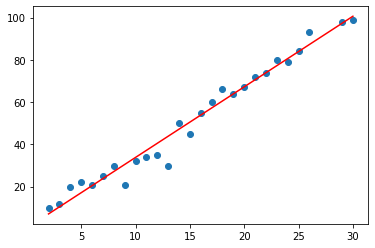

In [83]:
theta_final, cost_history = descente_gradient(X, y, theta, learning_rate, n_iterations)
 
print("theta final: ",theta_final) #parametres du modele une fois que la machine a été entrainée
 
# Prédictions du modele final
predictions = modele(X, theta_final)
#print("predictions : ", predictions)
print("x",x.shape)
print("y",y.shape)
print("X",X.shape)
 
# Affiche la droite de prédictions
plt.scatter(x, y)
plt.plot(x, predictions, c='r')
plt.show()

### Evaluer le modèle en utilisant le coefficient de détermination


#### Méthode 1: Pearson

In [89]:
# test de corrélation de Pearson
from scipy.stats import pearsonr

test=pd.DataFrame(pearsonr(dataframe['note'], dataframe['heure_rev']), index = ['Pearson_coef', 'p_value'],
columns = ['Resultat'])

print(test)
print('-----------------------------------')
mask=test['Resultat']>0.5
filtre_test=test[mask]
print('test filtré : \n',filtre_test)
print('-----------------------------------')
calcul=filtre_test**2
print("Calcul de R² : \n", calcul)


                  Resultat
Pearson_coef  9.865700e-01
p_value       3.398679e-21
-----------------------------------
test filtré : 
               Resultat
Pearson_coef   0.98657
-----------------------------------
Calcul de R² : 
               Resultat
Pearson_coef   0.97332


#### méthode 2: Coefficient de Détermination

In [90]:
def coef_determination(y, predictions):
    u = ((y - predictions)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

coef_determination(y, predictions)

0.9733201263085803

#### Méthode 3:  Affichage de l'historique de la fonction coût : Erreur Quadratique moyenne

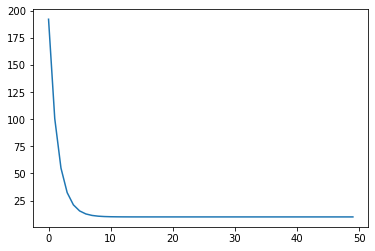

In [91]:
plt.plot(range(n_iterations), cost_history)
plt.show()

#### Méthode 3: avec Sklearn

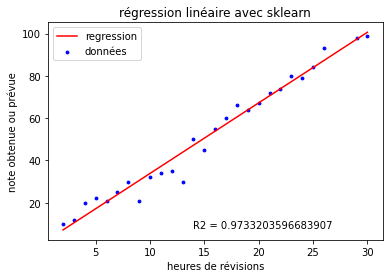

In [98]:
# avec LinearRegression de sklearn
from sklearn.linear_model import LinearRegression


lr = LinearRegression()
lr.fit(X,y)
r2 = lr.score(X,y)
str = f'R2 = {r2}'

pred = lr.predict(X)

plt.figure()

plt.title("régression linéaire avec sklearn")
plt.scatter(x,y, c='b',s=8, label="données")
plt.plot(x,pred, c="r", label="regression")
plt.text(14, 8, str)
plt.xlabel("heures de révisions")
plt.ylabel("note obtenue ou prévue")
plt.legend()
plt.show()

# Régression linéaire multiple :

L’exemple développé à partir de deux variables (régression simple) permet de comprendre la logique de la théorie de la régression mais il ne peut être généralisé de la sorte aux régressions multiples. Le système à deux équations à deux inconnus présenté se résolvait facilement comme on l’a vu. Les équations se compliquent avec plusieurs régresseurs, deux méthodes distinctes permettent de résoudre les équations. La première repose sur la connaissance des coefficients de corrélation linéaire simple de toutes les paires de variables entre elles, de la moyenne arithmétique et des écarts-types de toutes les variables. La seconde repose sur des calculs matriciels. En utilisant la méthode matricielle :

- Implémentez un modèle de régression multiple sur la base de données issue du fichier nommé boston_house_prices.csv (sans utiliser la bibliothèque Scikit-learn).
- Évaluez les résultats obtenus en utilisant la fonction mean_squared_error de sklearn


In [93]:
boston=pd.read_csv("./Data_Reg/boston_house_prices.csv")
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [94]:
dataframe02= pd.DataFrame(boston)
dataframe02.isnull() #Vérification si présence de valeurs nulles (False si valeur ok // True si pas de valeur)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


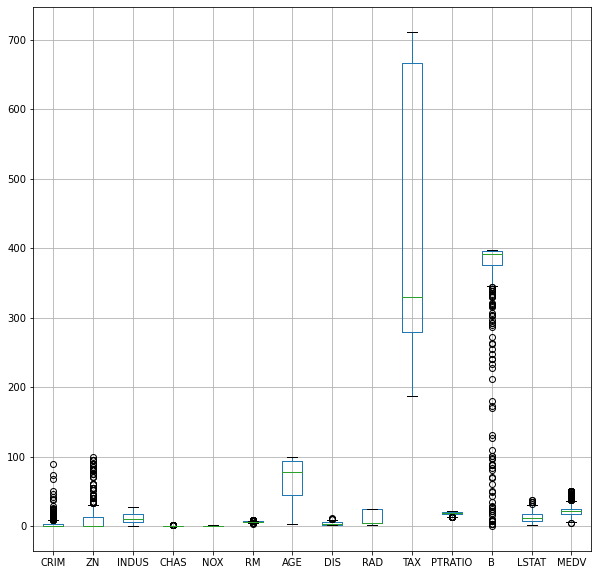

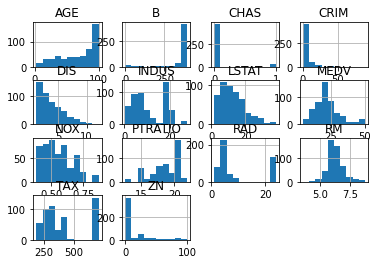

In [124]:
plt.figure(figsize=(10,10))
boston.boxplot()
boston.hist()
plt.show()

### Méthode Pearson pour choix des variables explicatives
#### Recherche de la corrélation dans la colonne MEDV avec valeur absolue car 1 et -1 sont corrélées

In [127]:
dataframe02.corrwith(dataframe02['MEDV'], method='pearson').abs().sort_values(ascending=False)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
dtype: float64

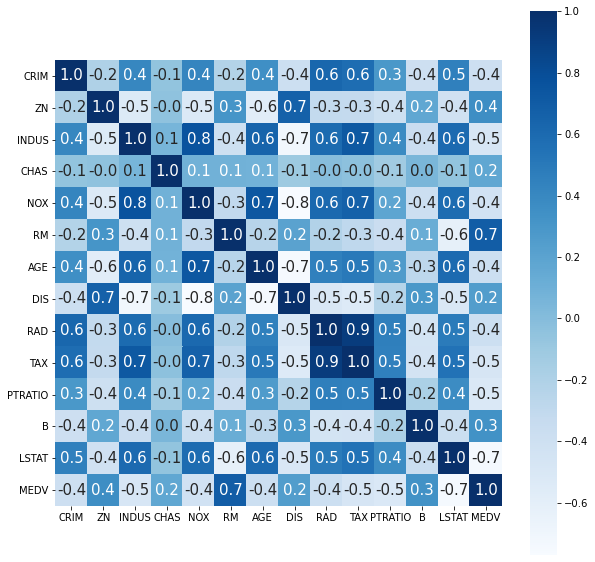

In [128]:
# visualisation du jeu de données sous forme de heatmap
import seaborn as sns
correlation=dataframe02.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

In [129]:
selection_col=dataframe02.iloc[: , [5,12]] #Selection de la colonne 5: 'RM' et 12: 'LSTAT'

x = np.array(selection_col) # Variables explicatives

y = np.array(dataframe02['MEDV'])
y = y.reshape((len(y),1))

print("shape de x: ", x.shape)
print("shape de y: ", y.shape)

shape de x:  (506, 2)
shape de y:  (506, 1)


In [152]:
#3-Création du modèle (model(X,theta))

#concaténation avec hstack
test=np.ones((506,1))
X = np.hstack((x, test))
#X = np.hstack((x, np.ones(x.shape)))
print("shape X: ",X.shape)
print("Matrice de X colonne 2:", X[:1])
#print("test:\n",X[:1])

print("------------------------------------------------------------")

#Création du theta aléatoire 3 lignes/1 colonne
theta = np.random.randn(3,1)
print("shape theta: ",theta.shape)
print(" Matrice de theta:")
print(theta)

shape X:  (506, 3)
Matrice de X colonne 2: [[6.575 4.98  1.   ]]
------------------------------------------------------------
shape theta:  (3, 1)
 Matrice de theta:
[[-1.45511336]
 [-0.88319013]
 [ 0.54320722]]


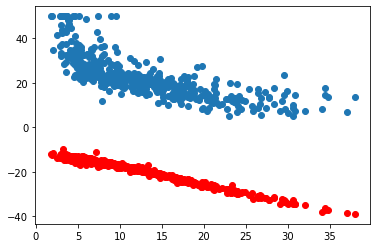

In [153]:
modele(X,theta)

plt.scatter(x[:,1],y)
plt.scatter(x[:,1],modele(X,theta), c='r')


plt.show() 

In [154]:
fonction_cout(X,y,theta)
gradient(X,y,theta)

learning_rate = 0.01
n_iterations = 100
descente_gradient(X,y,theta,learning_rate,n_iterations)

(array([[-7.33888001e+14],
        [-1.91990375e+15],
        [-1.20432262e+14]]),
 array([1.59393004e+03, 2.98355814e+03, 5.78203055e+03, 1.13744661e+04,
        2.25165096e+04, 4.46885990e+04, 8.87888091e+04, 1.76487265e+05,
        3.50872721e+05, 6.97621889e+05, 1.38709186e+06, 2.75801527e+06,
        5.48391701e+06, 1.09040117e+07, 2.16811489e+07, 4.31100500e+07,
        8.57185619e+07, 1.70439904e+08, 3.38896989e+08, 6.73851427e+08,
        1.33986363e+09, 2.66414004e+09, 5.29728699e+09, 1.05329484e+10,
        2.09433624e+10, 4.16430817e+10, 8.28017115e+10, 1.64640155e+11,
        3.27364981e+11, 6.50921585e+11, 1.29427072e+12, 2.57348464e+12,
        5.11703083e+12, 1.01745330e+13, 2.02307014e+13, 4.02260504e+13,
        7.99841339e+13, 1.59037778e+14, 3.16225402e+14, 6.28772018e+14,
        1.25022926e+15, 2.48591407e+15, 4.94290844e+15, 9.82831391e+15,
        1.95422908e+16, 3.88572378e+16, 7.72624328e+16, 1.53626039e+17,
        3.05464880e+17, 6.07376156e+17, 1.20768644e+1

[[ 4.71770563]
 [-0.6691397 ]
 [ 1.36652751]]
x (506, 2)
y (506, 1)
X (506, 3)


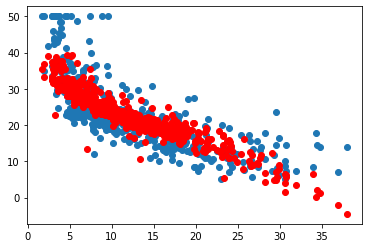

In [155]:
learning_rate = 0.002
n_iterations = 1000
 
theta_final, cost_history = descente_gradient(X, y, theta, learning_rate, n_iterations)
 
print(theta_final) #parametres du modele une fois que la machine a été entrainée
 
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = modele(X, theta_final)

print("x",x.shape)
print("y",y.shape)
print("X",X.shape)
# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x[ :, 1], y)
plt.scatter(x[ :, 1], predictions, c='r')
plt.show()

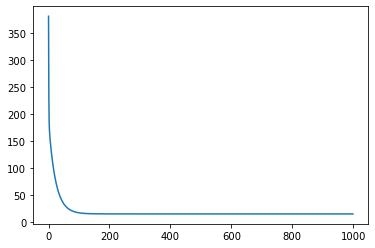

In [156]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [157]:
coef_determination(y, predictions)

0.638031642236172

In [158]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
erreur = mean_squared_error(X[:,0], y)
print(erreur)

339.946211555336


# Régression Polynomiale :

En utilisant les bibliothèques adéquates de Python, implémentez un modèle de régression polynomiale sur le jeu de données issu du fichier **Position_Salaire.csv **(sans utiliser la bibliothèque Scikit-learn).

- Appliquez le même modèle sur le jeu de données issu du fichier data/qualite_vin_rouge.csv
- Évaluez votre modèle.


In [159]:
#1-Récupération des données

salaires=pd.read_csv("./Data_Reg/Position_Salaries.csv")
salaires

,Position,Level,Salary
0,Project Analyste,1,45000
1,Ingenieur,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Gouverneur,6,150000
6,Associate,7,200000
7,Commercial,8,300000
8,C-level,9,500000
9,PDG,10,1000000


In [161]:
#2-Visualisation des données

dataframe03= pd.DataFrame(salaires)
x = np.array(dataframe03['Level'])
x=x.reshape(10,1)

col_un=np.ones(x.shape)


X = np.hstack((x, col_un))
X = np.hstack((x**2,X))
print(X)


y = np.array(dataframe03['Salary'])
y = y.reshape((len(y),1))

print("shape de x: ", x.shape)
print('--------------------------------------------------------------')
print("shape de X: ", X.shape)
print('--------------------------------------------------------------')
print("shape de y: ", y.shape)
print('--------------------------------------------------------------')


[[  1.   1.   1.]
 [  4.   2.   1.]
 [  9.   3.   1.]
 [ 16.   4.   1.]
 [ 25.   5.   1.]
 [ 36.   6.   1.]
 [ 49.   7.   1.]
 [ 64.   8.   1.]
 [ 81.   9.   1.]
 [100.  10.   1.]]
shape de x:  (10, 1)
--------------------------------------------------------------
shape de X:  (10, 3)
--------------------------------------------------------------
shape de y:  (10, 1)
--------------------------------------------------------------


Text(0, 0.5, 'Salaire')

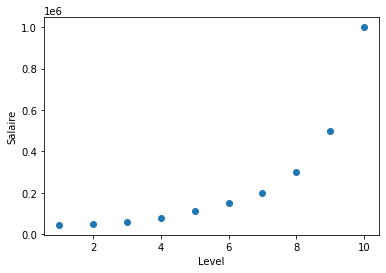

In [162]:

plt.scatter(x,y)
plt.xlabel('Level')
plt.ylabel('Salaire')

In [166]:
#Création du theta aléatoire 3 lignes/1 colonne en lien avec le nb de paramètres (ici a,b et c donc 3 paramètres)
theta = np.random.randn(3,1)

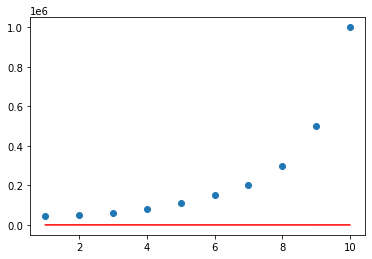

In [167]:
modele(X, theta)

plt.scatter(x,y)
plt.plot(x,modele(X,theta), c='r')


plt.show() 

In [168]:
fonction_cout(X,y,theta)
gradient(X,y,theta)

learning_rate = 0.0001
n_iterations = 1000

descente_gradient(X,y,theta,learning_rate,n_iterations)

(array([[ 8146.80534895],
        [-8616.53385849],
        [-1830.16558961]]),
 array([4.29480312e+10, 2.72027022e+10, 1.85100647e+10, 1.37108133e+10,
        1.10608770e+10, 9.59745458e+09, 8.78903853e+09, 8.34221418e+09,
        8.09500413e+09, 7.95798996e+09, 7.88180889e+09, 7.83921057e+09,
        7.81515164e+09, 7.80132753e+09, 7.79315377e+09, 7.78809951e+09,
        7.78476765e+09, 7.78238691e+09, 7.78053151e+09, 7.77896641e+09,
        7.77756185e+09, 7.77624619e+09, 7.77497991e+09, 7.77374116e+09,
        7.77251790e+09, 7.77130347e+09, 7.77009419e+09, 7.76888806e+09,
        7.76768393e+09, 7.76648120e+09, 7.76527952e+09, 7.76407871e+09,
        7.76287865e+09, 7.76167930e+09, 7.76048062e+09, 7.75928260e+09,
        7.75808521e+09, 7.75688846e+09, 7.75569235e+09, 7.75449687e+09,
        7.75330201e+09, 7.75210779e+09, 7.75091420e+09, 7.74972123e+09,
        7.74852889e+09, 7.74733719e+09, 7.74614610e+09, 7.74495565e+09,
        7.74376582e+09, 7.74257662e+09, 7.74138804e+09, 

### Entrainement du modèle


[[7117.40388732]
 [-220.9201479 ]
 [-130.1269504 ]]


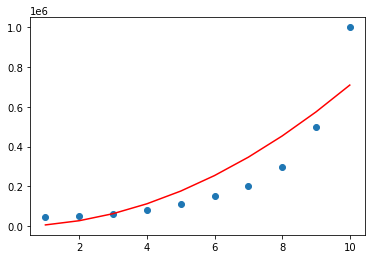

In [171]:
learning_rate = 0.0001
n_iterations = 100
 
theta_final, cost_history = descente_gradient(X, y, theta, learning_rate, n_iterations)
 
print(theta_final) #parametres du modele une fois que la machine a été entrainée
 
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = modele(X, theta_final)
#print(predictions)

# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.plot(X[:,1], predictions, c='r')
plt.show()

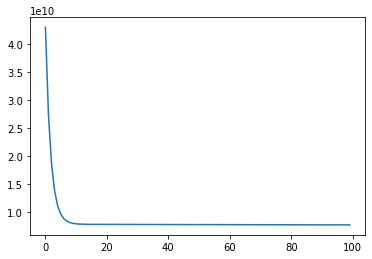

In [172]:
plt.plot(range(n_iterations), cost_history)
plt.show()

In [173]:
coef_determination(y, predictions)

0.809479460523235

## Régression polynomiale: data VIN

In [176]:
#1-Récupération des données

vin=pd.read_csv("./Data_Reg/qualite-vin-rouge.csv")
dataframe04= pd.DataFrame(vin)
dataframe04

,acidité fixe,acidité volatile,acide citrique,sucre résiduel,chlorures,dioxyde de soufre libre,anhydride sulfureux total,densité,pH,sulphates,alcool,qualité
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [177]:
#Recherche de la corrélation dans la colonne MEDV avec valeur absolue car 1 et -1 sont corrélées
dataframe04.corrwith(dataframe04['qualité'], method='pearson').abs().sort_values(ascending=False)

qualité                      1.000000
alcool                       0.476166
acidité volatile             0.390558
sulphates                    0.251397
acide citrique               0.226373
anhydride sulfureux total    0.185100
densité                      0.174919
chlorures                    0.128907
acidité fixe                 0.124052
pH                           0.057731
dioxyde de soufre libre      0.050656
sucre résiduel               0.013732
dtype: float64

shape de x:  (1599, 2)
--------------------------------------------------------------
shape de X:  (1599, 6)
--------------------------------------------------------------
shape de y:  (1599, 1)
--------------------------------------------------------------


Text(0, 0.5, 'Qualité')

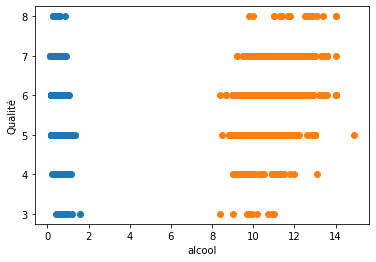

In [178]:
selection_col=dataframe04.iloc[: , [1,10]] #Selection de la colonne 2: 'acid volatile' et 11: 'alcool'

x = np.array(selection_col)

col_un=np.ones(x.shape)

X = np.hstack((x, col_un))
X = np.hstack((x**2,X))



y = np.array(dataframe04['qualité'])
y = y.reshape((len(y),1))

print("shape de x: ", x.shape)
print('--------------------------------------------------------------')
print("shape de X: ", X.shape)
print('--------------------------------------------------------------')
print("shape de y: ", y.shape)
print('--------------------------------------------------------------')

plt.scatter(x[:,0],y)
plt.xlabel('acide volatile')
plt.ylabel('Qualité')

plt.scatter(x[:,1],y)
plt.xlabel('alcool')
plt.ylabel('Qualité')

In [182]:
#Création du theta aléatoire 6 lignes/1 colonne en lien avec le nb de paramètres 
#(ici a,b et c donc 3 paramètres)
theta = np.random.randn(6,1)

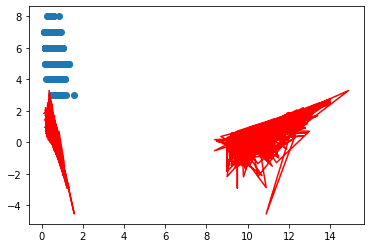

In [180]:
modele(X, theta)

plt.scatter(x[:,0],y)
plt.plot(x,modele(X,theta), c='r')


plt.show() 

#### La régression linéaire n'est pas adaptée

# Scikit-Learn :

- Refaire les 3 régressions avec le module Scikit-Learn
- Comparez les résultats de prédiction avec la méthode normale



**Pour aller plus loin :**

-  Réaliser une interface graphique qui permet de parcourir un jeu de données, le visualiser.
- Dans l’interface on peut avoir le choix d’utiliser un modèle spécifique (régression linéaire, polynomiale, multiple) pour l’appliquer à un jeu de données, de régler les paramètres (learning rate, iterations). Cette interface va ensuite nous permettre de visualiser notre modèle sur le jeu de données, de visualiser la fonction de coût et afficher les performances de notre modèle.


## Régression linéaire:

In [202]:
#1-Récupération des données

reg_simple=pd.read_csv("./Data_Reg/reg_simple.csv")
reg_simple


#2-Visualisation des données

dataframe= pd.DataFrame(reg_simple)

dataframe.head()

,heure_rev,note
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21


shape de x:  (27, 1)
--------------------------------------------------------------
shape de y:  (27, 1)
--------------------------------------------------------------


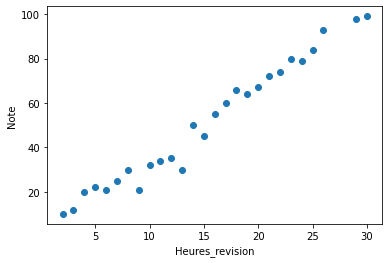

In [203]:
x = np.array(dataframe['heure_rev']) # Variable explicative
x = x.reshape((len(x),1))

y = np.array(dataframe['note'])
y = y.reshape((len(y),1))

x_base=x
y_base=y

print("shape de x: ", x.shape)
print('--------------------------------------------------------------')
print("shape de y: ", y.shape)
print('--------------------------------------------------------------')


plt.scatter(x,y)
plt.xlabel('Heures_revision')
plt.ylabel('Note')

plt.show() 

In [204]:
#Régression linéaire simple
from sklearn.linear_model import LinearRegression

#instancier 
regressor = LinearRegression()

#entrainer
regressor.fit(x, y)

#Coefficient de détermination
coef_determination=regressor.score(x,y)
print("coef_determination:",coef_determination)

#Predictions
predictions=regressor.predict(x)

coef_determination: 0.9733203596683907


<function matplotlib.pyplot.show(*args, **kw)>

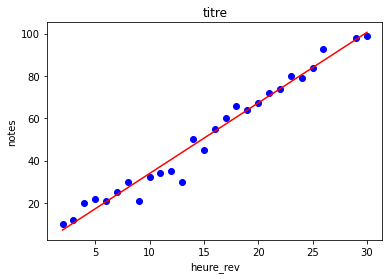

In [205]:
#visuel

plt.scatter(x_base, y_base, color = 'blue')
plt.plot(x,predictions, color = 'red')
#plt.plot(x,regressor.predict(x), color = 'red')

plt.title('titre')
plt.xlabel("heure_rev")
plt.ylabel('notes')
plt.show

## Régression polynomiale:

In [206]:
#1-Récupération des données

boston=pd.read_csv("./Data_Reg/boston_house_prices.csv")
dataframe02= pd.DataFrame(boston)

dataframe02.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [207]:

selection_col=dataframe02.iloc[: , [5,12]] #Selection de la colonne 5: 'RM' et 12: 'LSTA'

X = np.array(selection_col) # Variables explicatives

Y = np.array(dataframe02['MEDV'])
Y = Y.reshape((len(X),1))

print("shape de X: ", X.shape)
print('--------------------------------------------------------------')
print("shape de Y: ", Y.shape)
print('--------------------------------------------------------------')

shape de X:  (506, 2)
--------------------------------------------------------------
shape de Y:  (506, 1)
--------------------------------------------------------------


In [208]:
#base d'apprentissage et base de test
from sklearn.model_selection import train_test_split
  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404, 1)
(102, 1)


In [209]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

#Fonction pour entrainer et choisir notre modèle en fonction du degré du polynome
 
def evalPolynomialRegression(degree):
    #entrainement du modèle
    polynomial_features= PolynomialFeatures(degree=degree)
    X_train_poly = polynomial_features.fit_transform(X_train)
    X_test_poly = polynomial_features.fit_transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, Y_train)
    
    # Evaluation du train set
    y_train_predict = model.predict(X_train_poly)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)
 
    print("-------------TRAIN SET - DEGREE: {}----------------".format(degree))
    #print("---------------------------------------------------")
    print('Erreur quadratique moyenne: {}'.format(rmse))
    print('Le score R2 est {}'.format(r2))
    print('\n')
 
    # Evaluation du test set
    y_test_predict = model.predict(X_test_poly)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2 = r2_score(Y_test, y_test_predict)
 
    print("-------------TEST SET - DEGREE: {}-----------------".format(degree))
    #print("---------------------------------------------------")
    print('Erreur quadratique moyenne: {}'.format(rmse))
    print('Le score R2 est {}'.format(r2))
    
    return model,r2 ,rmse

In [213]:
#Boucle pour voir chaque degrés
for i in range(2,10):
    evalPolynomialRegression(i)
    print('--------------------------------------------')
    print('--------------------------------------------\n')

-------------TRAIN SET - DEGREE: 2----------------
Erreur quadratique moyenne: 4.319658995006361
Le score R2 est 0.780847562402052


-------------TEST SET - DEGREE: 2-----------------
Erreur quadratique moyenne: 5.305183490052368
Le score R2 est 0.6543594328054192
--------------------------------------------
--------------------------------------------

-------------TRAIN SET - DEGREE: 3----------------
Erreur quadratique moyenne: 4.1325239288322075
Le score R2 est 0.7994243852918262


-------------TEST SET - DEGREE: 3-----------------
Erreur quadratique moyenne: 5.344826137047589
Le score R2 est 0.6491745787543439
--------------------------------------------
--------------------------------------------

-------------TRAIN SET - DEGREE: 4----------------
Erreur quadratique moyenne: 3.7667630276293247
Le score R2 est 0.8333581893171975


-------------TEST SET - DEGREE: 4-----------------
Erreur quadratique moyenne: 5.830886161269425
Le score R2 est 0.582464875694864
--------------------

## Salaire en fonction de la qualification

In [215]:
pos = pd.read_csv('Data_Reg/Position_Salaries.csv')
pos.head()

,Position,Level,Salary
0,Project Analyste,1,45000
1,Ingenieur,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


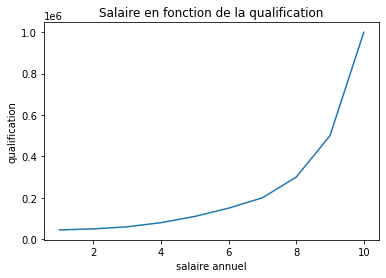

la méthode utilisée sera donc la régression polynomiale


In [217]:
plt.figure()

plt.title('Salaire en fonction de la qualification')
plt.plot(pos['Level'], pos['Salary'])
plt.xlabel("salaire annuel")
plt.ylabel("qualification")
plt.show()


In [222]:
def verif_shape(X,y,theta):
    print(f'taille features : {X.shape}')
    print(f'taille target : {y.shape}')
    print(f'taille theta : {theta.shape}')
    
#test avec une courbe du second degré
x1 = np.array(pos['Level'])
x1 = x1.reshape(x1.shape[0], 1)
x2 = x1**2
ones = np.ones((x1.shape[0], 1))
X = np.hstack((x2,x1,ones))

y = np.array(pos['Salary'])
y = y.reshape(( y.shape[0], 1 ))

theta = np.random.randn(X.shape[1], 1)

# vérification des dimensions des matrices : 
verif_shape(X,y,theta)

taille features : (10, 3)
taille target : (10, 1)
taille theta : (3, 1)


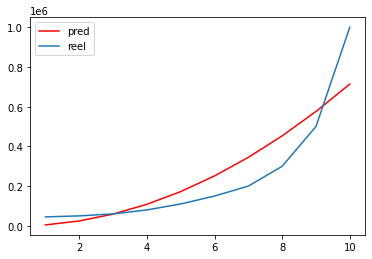

In [224]:
n_iterations = 300
learning_rate = 0.0001

# apprentissage 
theta_final, cost_history = descente_gradient(X, y, theta, learning_rate, n_iterations)

predictions = modele(X, theta_final)

plt.plot(pos['Level'], predictions, label="pred", c='r')
plt.plot(pos['Level'], pos['Salary'], label="reel")
plt.legend()

# predictions.shape

## sklearn

In [225]:
lr = LinearRegression()
lr.fit(X,y)
r2 = lr.score(X,y)
pred = lr.predict(X)


print(f'R2 = {r2}')

R2 = 0.9162082221443942


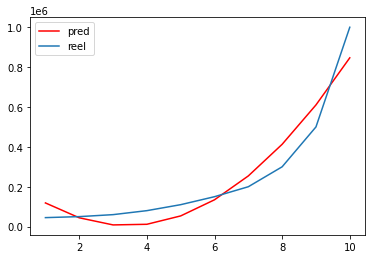

In [226]:
plt.plot(pos['Level'], pred, label="pred", c='r')
plt.plot(pos['Level'], pos['Salary'], label="reel")
plt.legend()


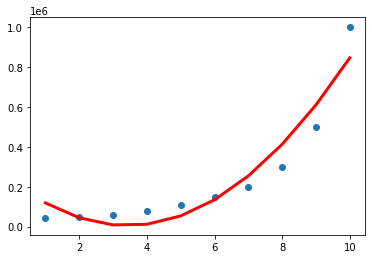

Le r2 de ce modèle est 0.9162082221443942 pour le degré 2


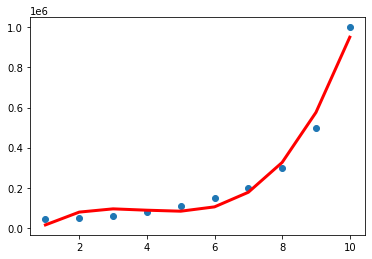

Le r2 de ce modèle est 0.9812097727913367 pour le degré 3


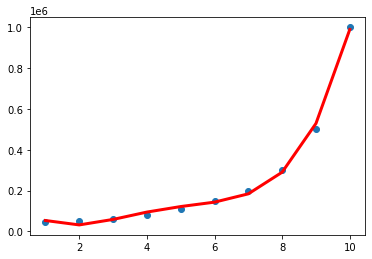

Le r2 de ce modèle est 0.9973922891706614 pour le degré 4


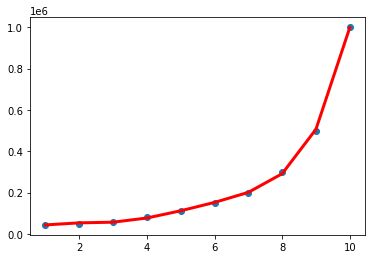

Le r2 de ce modèle est 0.9997969027099755 pour le degré 5


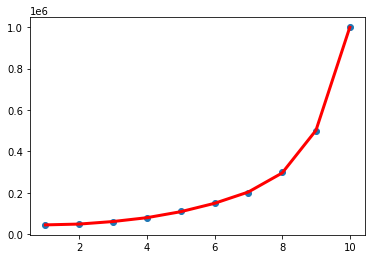

Le r2 de ce modèle est 0.9999494749253776 pour le degré 6


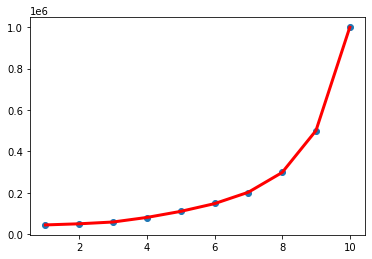

Le r2 de ce modèle est 0.9999770143729169 pour le degré 7


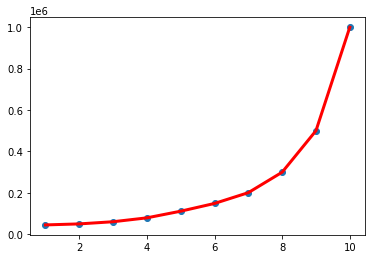

Le r2 de ce modèle est 0.9999934972438328 pour le degré 8


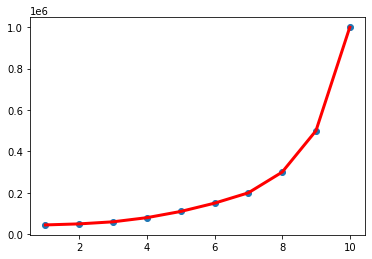

Le r2 de ce modèle est 0.9999999999999797 pour le degré 9


In [228]:
# avec PolynomialFeatures et LinearRegression :

y = pos['Salary']
X_t = np.array(pos['Level']).reshape(pos.shape[0],1)

for i in range(2, 10):
    
    X_poly = PolynomialFeatures(i).fit_transform(X_t)
    modele = LinearRegression().fit(X_poly, y)
    r2 = modele.score(X_poly, y)
    y_pred = modele.predict(X_poly)

    plt.figure()
    plt.scatter(X_t, y)
    plt.plot(X_t, y_pred, c='r', lw=3)
    plt.show()
    
    print(f'Le r2 de ce modèle est {r2} pour le degré {i}')